# Import libraries

In [ ]:
import pandas as pd
import numpy as np
#
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Prediction visualisation
import matplotlib.cm as cm # Used later on, has to be included in codeblock where it is used due to same name of fucntions in other packages
import matplotlib.pyplot as plt



# Tree Visualisation

import os
from sklearn.tree import export_graphviz

from subprocess import call
from IPython.display import Image




In [2]:
#Import the simulation models and the premade dataprep functions
# !!! make sure that the files are in the same folder
# import Game_of_Life

# When importing fire.py it automatically runs so that the array named array for ml is automatically created. The total number of pixels is also retrieved from the file by running this command 'import fire'
import fire

# This imports the data_prep.py file that contains the current version of the data prep files. Currently this only contains the neighebour extraction
import data_prep

In [15]:
# so far the Game of Life = GoL, does not save to csv if executed from command below. Has to be executed from command line anaconda prompt. This is why here I manually adjust the grid-size parameter for GameofLife
GoL_grid_size = 20

In [ ]:
# %run Game_of_Life.py --interval 100 --grid-size 5 --writetocsv --maxframes 3
%run Game_of_Life.py --interval 1000 --grid-size 20 --writetocsv --maxframes 100

# Get the data from the model and check if it makes sense

Only demand I have for the model output is that it is structured as follows:
- All pixels are flattened into an array
  - The pixels of the next time step are ammended to this array
- It should have an attribute that returns the number of pixels used in the simulation
- The software currently has issues with missing numbers of non - rectangular grids

In [3]:
GoL = False
FF = True

if GoL:
    data = np.genfromtxt('GoL_flat.csv' ,delimiter= ',')
    number_pixels  = GoL_grid_size**2

if FF:
    print('checkerdiecheckcheck')
    data = fire.array_for_ml
    number_pixels  = fire.number_pixels


print(len(data))
print(data.shape) #should be one long 1 dimensional array
print(number_pixels)
print(data)

checkerdiecheckcheck
4500000
(4500000,)
90000
[0. 0. 0. ... 0. 0. 0.]


# Data preprocessing

### Shape the long 1D array from the model with all the simulated pixels to a dataframe where all neighbours are used as features

In [4]:
print(len(data))
print(number_pixels)
print(type(data))
print(data[155])
df = data_prep.neighbour_as_feature(data, number_pixels)
print(df)

4500000
90000
<class 'numpy.ndarray'>
0.0
4500000
300
         x_input  left  top_left  top  top_right  right  bottom_right  bottom  \
0            0.0   0.0       0.0  0.0        0.0    0.0           0.0     0.0   
1            0.0   0.0       0.0  0.0        0.0    0.0           0.0     0.0   
2            0.0   0.0       0.0  0.0        0.0    0.0           0.0     0.0   
3            0.0   0.0       0.0  0.0        0.0    0.0           0.0     0.0   
4            0.0   0.0       0.0  0.0        0.0    0.0           0.0     0.0   
...          ...   ...       ...  ...        ...    ...           ...     ...   
4409995      0.0   0.0       0.0  0.0        0.0    0.0           0.0     0.0   
4409996      0.0   0.0       0.0  0.0        0.0    0.0           0.0     0.0   
4409997      0.0   0.0       0.0  0.0        0.0    0.0           0.0     0.0   
4409998      0.0   0.0       0.0  0.0        0.0    0.0           0.0     0.0   
4409999      0.0   0.0       0.0  0.0        0.0    0.0

In [5]:
df = data_prep.neighbour_as_feature(data, number_pixels)

features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Extract feature names for later processing
colnames = list(df.columns.values.tolist())
feature_names = colnames[:-1]
label_name = colnames[-1]

print(feature_names)
print(features.shape)
print(label_name)
print(labels.shape)

4500000
300
['x_input', 'left', 'top_left', 'top', 'top_right', 'right', 'bottom_right', 'bottom', 'bottom_left']
(4410000, 9)
y_label
(4410000,)


### Split the data into train /test data

In [6]:
# Split the data into training and test sets
# Random test/train split
# X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

# #Test/Train split on last simulated state !! Can easily be changed to stage x in the middle
X_train = features.iloc[:-number_pixels, :]
y_train = labels.iloc[:-number_pixels]

X_test = features.iloc[-number_pixels:, :]
y_test =  labels.iloc[-number_pixels:]

print(X_train.shape) #training features
print(y_train.shape) #training labels

print(X_test.shape) #testing features
print(y_test.shape) #testing labels

print(features.shape) #total just to check if testing is really not inside training. shapes add up
print(labels.shape)

(4320000, 9)
(4320000,)
(90000, 9)
(90000,)
(4410000, 9)
(4410000,)


# Visualise the training and test sets

only visible with small grids

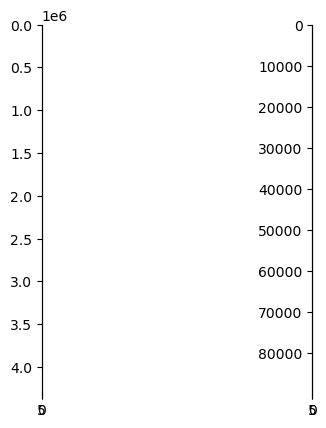

In [7]:
import matplotlib.cm as cm
fig = plt.figure()
ax1 = fig.add_subplot(121)
# Bilinear interpolation - this will look blurry
ax1.imshow(X_train, interpolation='nearest', cmap=cm.Greys_r)

ax2 = fig.add_subplot(122)
# 'nearest' interpolation - faithful but blocky
ax2.imshow(X_test, interpolation='nearest', cmap=cm.Greys_r)

plt.show()

# Fit ML model

Chosen here for a Random forest classifier at the moment, later this week I will add a RF regressor and after that some other ML models.

In [8]:
#fitting the classifier
rf = RandomForestClassifier(max_depth=8) # max depth to only include neighbour interactions, more gives redundancy atm. for more complex models this should be changed to a higher number.
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=8)

Support vector machine

In [9]:
from sklearn import svm
svm_lin = svm.LinearSVC()
svm_lin.fit(X_train, y_train)

LinearSVC()

# Predict on the test set

In [10]:
RF_ = True
SVM_ = True
if RF_:
    #predicting with RF
    y_pred_rf = rf.predict(X_test)
if SVM_:
    #Predicting with SVM
    y_pred_svm = svm_lin.predict(X_test)


In [16]:
y_pred = y_pred_rf

(300, 300)
(300, 300)


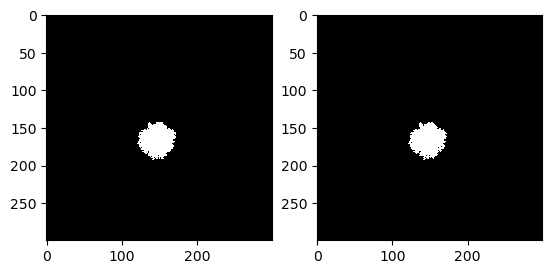

In [17]:
y_test = np.array(y_test)

y_test_plot = np.reshape(y_test,(int(np.sqrt(number_pixels)),int(np.sqrt(number_pixels))))
y_pred_plot = np.reshape(y_pred,(int(np.sqrt(number_pixels)),int(np.sqrt(number_pixels))))
# y_test_plot = np.reshape(y_test,(int(45),int(79)))
# y_pred_plot = np.reshape(y_pred,(int(45),int(79)))


print(y_pred_plot.shape)
print(y_test_plot.shape)

import matplotlib.cm as cm
fig = plt.figure()
ax1 = fig.add_subplot(121)
# Bilinear interpolation - this will look blurry
ax1.imshow(y_test_plot, interpolation='nearest', cmap=cm.Greys_r)

ax2 = fig.add_subplot(122)
# 'nearest' interpolation - faithful but blocky
ax2.imshow(y_pred_plot, interpolation='nearest', cmap=cm.Greys_r)

plt.show()

# Model performance

These performance measures are based on classification simulations such as game of life and forest fires.

In [18]:
#check accuracy of prediction
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(cm)
print("Accuracy:", accuracy)


[[88261     3]
 [   64  1672]]
Accuracy: 0.9992555555555556


Here will come some performance measures for regression simulation models with continuous outcomes. Such as the std RMSE and absolute error

# Visualisation of models decisions

The following code block represents the visualisation of a tree based model. The random forest predictor as defined above.

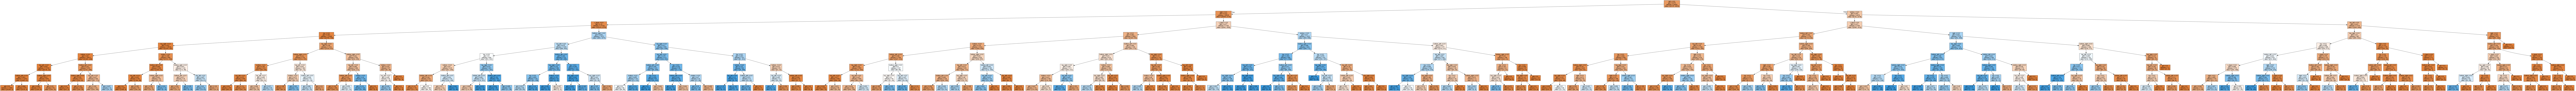

In [31]:
#
tree = rf.estimators_[1]
# tree = rf.estimators_[50]
# # Export as dot file
export_graphviz(tree, out_file='tree.dot',
                feature_names = feature_names ,
                class_names = None,
                rounded = False, proportion = False,
                precision = 3, filled = True)
#
# # Convert to png using system command (requires Graphviz)

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png'], shell=True, cwd=os.getcwd())
#
# # # # Display in script

Image(filename = 'tree.png')